In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x219c955f940>,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08}

In [11]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x219c956e748>,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [38]:
# Design a query to retrieve the last 12 months of precipitation data 
results= session.query(Measurement.date, Measurement.prcp)\
.filter(Measurement.date > '2016-08-23').order_by(Measurement.date).all()

results


[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [39]:
#Select only the `date` and `prcp` values.
# for row in session.query(Measurement.date, Measurement.prcp).limit(15).all():
#     print(row)

In [40]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# results = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()

df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df.head(10)

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


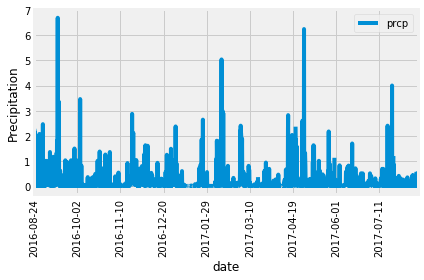

In [42]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)
plt.ylabel("Precipitation")
plt.tight_layout()

![precipitation](Images/precipitation.png)

In [16]:
# Use Pandas to print the summary statistics for the precipitation data.--Count

prcp_count=session.query(func.count(Measurement.prcp)).all()
prcp_count

[(18103)]

In [17]:
# Use Pandas to print the summary statistics for the precipitation data.--Average

prcp_avg=session.query(func.avg(Measurement.prcp)).all()
prcp_avg

[(0.16064353974479206)]

In [18]:
# Use Pandas to print the summary statistics for the precipitation data.--Minimum

prcp_min=session.query(func.min(Measurement.prcp)).all()
prcp_min

[(0.0)]

In [19]:
# Use Pandas to print the summary statistics for the precipitation data.--Maximum

prcp_max=session.query(func.max(Measurement.prcp)).all()
prcp_max

[(11.53)]

In [20]:
# Use Pandas to print the summary statistics for the precipitation data.

data_file = "Resources/hawaii_measurements.csv"
data_file_pd = pd.read_csv(data_file)
data_file_pd.head()
data_file_pd.describe()

,prcp,tobs
count,18103.000000,19550.000000
mean,0.160644,73.097954
std,0.468746,4.523527
min,0.000000,53.000000
25%,0.000000,70.000000
50%,0.010000,73.000000
75%,0.110000,76.000000
max,11.530000,87.000000


In [21]:
# Design a query to show how many stations are available in this dataset?
session.query(Station).count()

9

In [43]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# session.query(Measurement.station, Measurement.tobs).order_by(Measurement.tobs.desc()).all()

sel = [Measurement.station,  
       func.count(Measurement.tobs)]

most_rows= session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

most_rows

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 

sel = [Measurement.station, 
       func.min(Measurement.tobs)]

lowest_temp= session.query(*sel).filter(Measurement.station == "USC00519281").all()

lowest_temp

[('USC00519281', 54.0)]

In [24]:
# highest temperature recorded, 
sel = [Measurement.station, 
       func.max(Measurement.tobs)]

highest_temp= session.query(*sel).filter(Measurement.station == "USC00519281").all()

highest_temp

[('USC00519281', 85.0)]

In [25]:
# and average temperature most active station?
sel = [Measurement.station, 
       func.avg(Measurement.tobs)]

average_temp= session.query(*sel).filter(Measurement.station == "USC00519281").all()

average_temp

[('USC00519281', 71.66378066378067)]

In [48]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 
results2= session.query(Measurement.tobs, Measurement.date)\
.filter(Measurement.station == "USC00519281")\
.filter(Measurement.date > '2016-08-23').order_by(Measurement.date).all()

results2


[(77.0, '2016-08-24'),
 (80.0, '2016-08-25'),
 (80.0, '2016-08-26'),
 (75.0, '2016-08-27'),
 (73.0, '2016-08-28'),
 (78.0, '2016-08-29'),
 (77.0, '2016-08-30'),
 (78.0, '2016-08-31'),
 (80.0, '2016-09-01'),
 (80.0, '2016-09-02'),
 (78.0, '2016-09-03'),
 (78.0, '2016-09-04'),
 (78.0, '2016-09-05'),
 (73.0, '2016-09-06'),
 (74.0, '2016-09-07'),
 (80.0, '2016-09-08'),
 (79.0, '2016-09-09'),
 (77.0, '2016-09-10'),
 (80.0, '2016-09-11'),
 (76.0, '2016-09-12'),
 (79.0, '2016-09-13'),
 (75.0, '2016-09-14'),
 (79.0, '2016-09-15'),
 (78.0, '2016-09-16'),
 (79.0, '2016-09-17'),
 (78.0, '2016-09-18'),
 (78.0, '2016-09-19'),
 (76.0, '2016-09-20'),
 (74.0, '2016-09-21'),
 (77.0, '2016-09-22'),
 (78.0, '2016-09-23'),
 (79.0, '2016-09-24'),
 (79.0, '2016-09-25'),
 (77.0, '2016-09-26'),
 (80.0, '2016-09-27'),
 (78.0, '2016-09-28'),
 (78.0, '2016-09-29'),
 (78.0, '2016-09-30'),
 (77.0, '2016-10-01'),
 (79.0, '2016-10-02'),
 (79.0, '2016-10-03'),
 (79.0, '2016-10-04'),
 (79.0, '2016-10-05'),
 (75.0, '20

In [51]:
# results = session.query(Measurement.date, Measurement.tobs).order_by(Measurement.date.desc()).all()

df2 = pd.DataFrame(results2)
df2.set_index('date', inplace=True)
df2.head(10)

,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
2016-08-29,78.0
2016-08-30,77.0
2016-08-31,78.0
2016-09-01,80.0


Text(0, 0.5, 'Frequency')

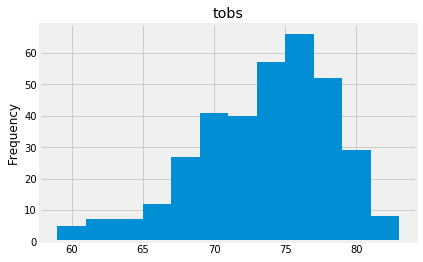

In [52]:
#Plot the results as a histogram with `bins=12`.
df2.hist(column='tobs', bins=12)
plt.ylabel("Frequency")

![precipitation](Images/station-histogram.png)